In [4]:
!pip install torchvision

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 128
data_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root="./data",train=True,transform=data_transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)


100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:07<00:00, 1.33MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 129kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 966kB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<?, ?B/s]


In [7]:
class AutoEncoder(nn.Module):
  def __init__(self, latent_dim=1):
    super().__init__()

    self.encoder = nn.Sequential(
        nn.Linear(784,256),
        nn.ReLU(),
        nn.Linear(256,latent_dim),
        nn.ReLU()
    )

    self.decoder = nn.Sequential(
        nn.Linear(latent_dim,256),
        nn.ReLU(),
        nn.Linear(256,784),
        nn.Sigmoid()
    )

  def forward(self, x):
    z = self.encoder(x)
    x_recon = self.decoder(z)
    return x_recon

In [8]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
epochs = 5

model.train()
for epoch in range(epochs):
  total_loss = 0
  for x, _ in train_loader:
    x = x.view(-1,784).to(device)
    optimizer.zero_grad()
    x_recon = model(x)
    loss = criterion(x_recon, x)
    loss.backward()
    optimizer.step()

    total_loss = total_loss + loss.item()

  avg_loss = total_loss / len(train_loader)
  print(f"Epoch [{epoch + 1}/{epochs}], Loss:{avg_loss}")

Epoch [1/5], Loss:0.06574269461987624
Epoch [2/5], Loss:0.05970022736041785
Epoch [3/5], Loss:0.05832946979637339
Epoch [4/5], Loss:0.057544090187371666
Epoch [5/5], Loss:0.05678171029032421


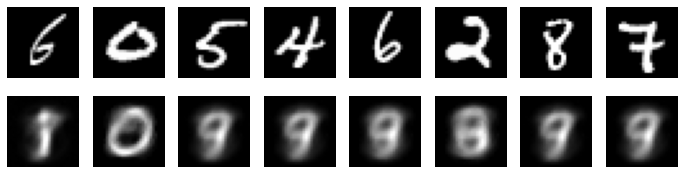

In [10]:
with torch.no_grad():
    x, _ = next(iter(train_loader))
    x = x.view(-1, 784).to(device)
    x_recon = model(x)

    n = 8
    plt.figure(figsize=(12, 3))

    for i in range(n):
      plt.subplot(2,n,i+1)
      plt.imshow(x[i].view(28,28), cmap="gray")
      plt.axis("off")

      plt.subplot(2,n,i+1+n)
      plt.imshow(x_recon[i].view(28,28), cmap="gray")
      plt.axis("off")

    plt.show()